In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=6, suppress=True)

from sklearn.model_selection import KFold

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Input, regularizers
from tensorflow.keras.regularizers import l2
import keras_tuner as kt
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from scipy import interpolate

import pathlib
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy import interpolate

print(tf.__version__)

2.17.0


# Load data

In [2]:
x = np.load(r'D:\AAA my works\Threshold calculation and prediction\一轮修改\data\x.npy')
y = np.load(r'D:\AAA my works\Threshold calculation and prediction\一轮修改\data\y.npy')

'''
x.shape: (N x 103)
    0-99: normalized potential distribution (maximum: 1; minimum: 0)
    100: fiber diameter (unit: μm; maximum: 5.7; minimum: 16.0)
    101: fiber length (unit: dm; maximum: 0.2; minimum: 1)
    102: stim pulse width (unit: ms; maximum: 0.1; minimum: 1)

y.shape: (N x 1)
    activation thresholds (unit: Volt; definition: The scaling factor muliplied by the potential distribution at which the axon is just activated in NEURON simulation.)
'''

print(x.shape, y.shape)

x_train = np.load(r'D:\AAA my works\Threshold calculation and prediction\一轮修改\data\x_train.npy')
y_train = np.load(r'D:\AAA my works\Threshold calculation and prediction\一轮修改\data\y_train.npy')
x_test = np.load(r'D:\AAA my works\Threshold calculation and prediction\一轮修改\data\x_test.npy')
y_test = np.load(r'D:\AAA my works\Threshold calculation and prediction\一轮修改\data\y_test.npy')

(399798, 103) (399798, 1)


# Predict activation thresholds

In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def thres_pred(x):

    average_thres = np.zeros((x.shape[0],1))

    for i in range(1,11):
        load_model = tf.keras.models.load_model('D:\\AAA my works\\Threshold calculation and prediction\\一轮修改\\models\\Actication_Predictor_fold_'+str(i)+'.keras')
        average_thres += load_model.predict(x,verbose=0)

    average_thres = average_thres/10

    pred_thres = average_thres * 0.002      # unit: Volt.    We nomalized the activation thresholds with a scaling factor of 0.002 when training the neural network

    return pred_thres

pred_y_train = thres_pred(x_train)
pred_y_test = thres_pred(x_test)

print('MAE (V):', mean_absolute_error(y_train, pred_y_train), mean_absolute_error(y_test, pred_y_test))
print('MSE (V):', mean_squared_error(y_train, pred_y_train), mean_squared_error(y_test, pred_y_test))
print('R2:', r2_score(y_train, pred_y_train), r2_score(y_test, pred_y_test))

d:\Anaconda\Anaconda_install\envs\exp1\lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


MAE (V): 6.532048331192144e-06 6.908308208430787e-06
MSE (V): 1.942219250600461e-10 2.964617444530103e-10
R2: 0.9993579327224348 0.9989995846044725


# Visualization

Text(0.5, 1.0, 'Test set')

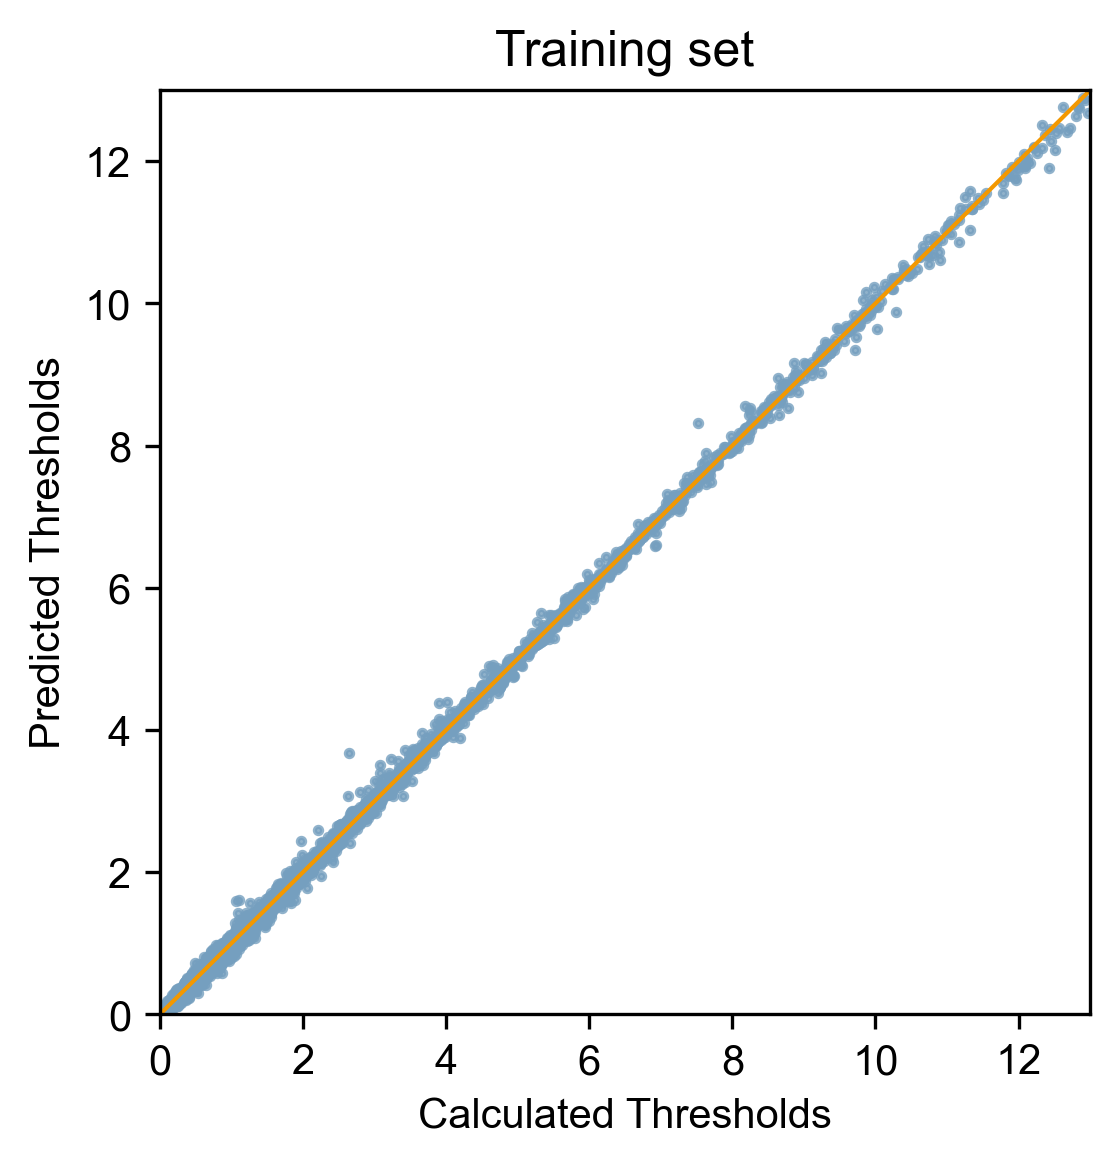

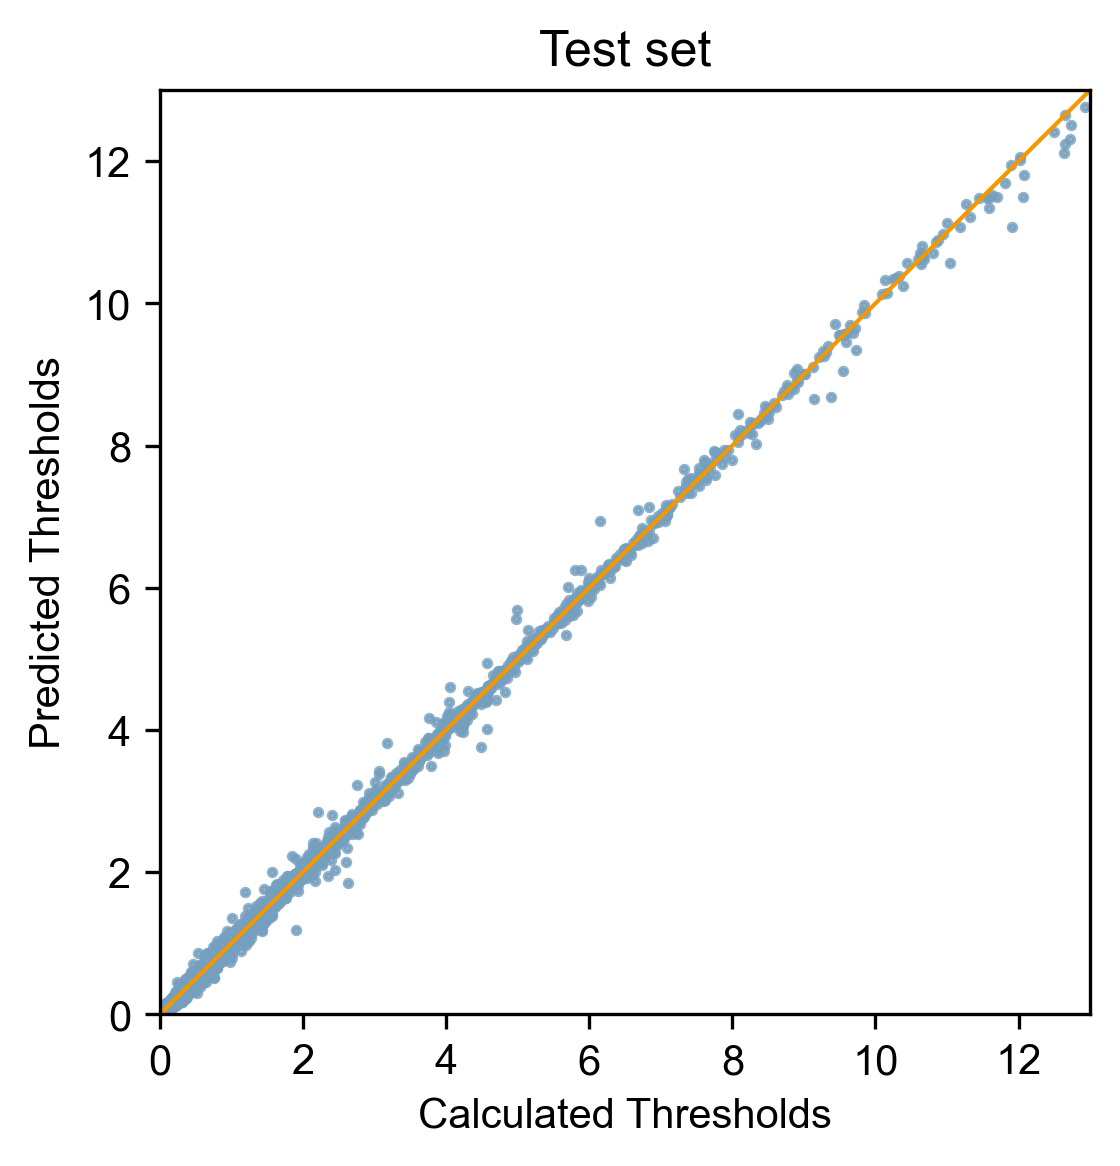

In [5]:
plt.rc('font',family='Arial') 

plt.figure(dpi=300, figsize=[4,4])
plt.plot(np.linspace(0,14,100), np.linspace(0,14,100), c="#f39800", zorder=2, linewidth=1)
plt.scatter(y_train*1000, pred_y_train*1000, s=3, color=[117/255,159/255,191/255], alpha=0.8)
plt.ylabel('Predicted Thresholds')
plt.xlabel('Calculated Thresholds')
plt.xlim([0,int(np.max(y_train*1000))+1])
plt.ylim([0,int(np.max(y_train*1000))+1])
plt.title('Training set')


plt.figure(dpi=300, figsize=[4,4])
plt.plot(np.linspace(0,14,100), np.linspace(0,14,100), c="#f39800", zorder=2, linewidth=1)
plt.scatter(y_test*1000, pred_y_test*1000, s=3, color=[117/255,159/255,191/255], alpha=0.8)
plt.ylabel('Predicted Thresholds')
plt.xlabel('Calculated Thresholds')
plt.xlim([0,int(np.max(y_test*1000))+1])
plt.ylim([0,int(np.max(y_test*1000))+1])
plt.title('Test set')
